In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from coffea.hist import Hist, plot
from coffea.util import load

In [2]:
x = np.linspace(0,10,11)
y = 2*x
y

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])

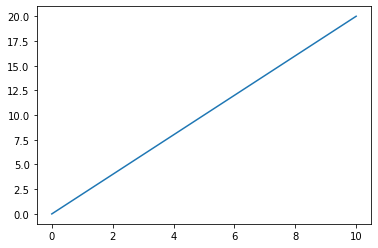

In [3]:
lines = plt.plot(x, y)

In [4]:
data_x, data_y = lines[0].get_data()
data_y

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])

In [5]:
filename = "/work/mmarcheg/PocketCoffea/output/semileptonic_triggerSF_2018_lumimask/output.coffea"
plot_dir = "/work/mmarcheg/PocketCoffea/output/semileptonic_triggerSF_2018_lumimask/plots/trigger_efficiency/"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
output = load(filename)
output

{'sum_genweights': defaultdict_accumulator(float,
                         {'TTToSemiLeptonic': 143354138329.1336,
                          'TTTo2L2Nu': 10457567170.13379}),
 'cutflow': {'Ele32_EleHT_pass': defaultdict_accumulator(int,
                          {'TTToSemiLeptonic': 13694,
                           'DATA': 30015,
                           'TTTo2L2Nu': 942439}),
  'Ele32_EleHT_fail': defaultdict_accumulator(int,
                          {'TTToSemiLeptonic': 20101,
                           'DATA': 12835,
                           'TTTo2L2Nu': 336646}),
  'inclusive': defaultdict_accumulator(int,
                          {'TTToSemiLeptonic': 33795,
                           'DATA': 42850,
                           'TTTo2L2Nu': 1279085}),
  'initial': defaultdict_accumulator(int,
                          {'TTToSemiLeptonic': 476408000,
                           'DATA': 985422152,
                           'TTTo2L2Nu': 145020000}),
  'skim': defaultdict_accumula

In [6]:
h = output["hist2d_electron_etaSC_vs_electron_pt"]
h

<Hist (sample,cat,year,pt,etaSC) instance at 0x7f1d0078cbe0>

In [7]:
h.identifiers('sample')

[<StringBin (DATA) instance at 0x7f1daf0797f0>,
 <StringBin (TTTo2L2Nu) instance at 0x7f1daf079790>,
 <StringBin (TTToSemiLeptonic) instance at 0x7f1daf079850>]

In [8]:
datasets = [str(s) for s in h.identifiers('sample')]
datasets_mc = list(filter(lambda x : 'TTTo' in x, datasets))
h_data = h['DATA'].sum('sample', 'year')
h_mc = h[datasets_mc].sum('sample', 'year')
h_mc.values()

{('Ele32_EleHT_pass',): array([[2.39734641e+00, 0.00000000e+00, 2.80033148e+00, 2.24785171e+00,
         1.99578279e+00, 1.56001757e+00, 0.00000000e+00, 1.84931328e+00],
        [2.37371826e+02, 0.00000000e+00, 4.50676590e+02, 8.14595331e+02,
         8.04246648e+02, 4.36342585e+02, 0.00000000e+00, 2.34057784e+02],
        [5.16294325e+02, 0.00000000e+00, 8.15743309e+02, 1.35460900e+03,
         1.35866031e+03, 7.93112672e+02, 0.00000000e+00, 5.02833999e+02],
        [4.35075801e+02, 0.00000000e+00, 7.22597980e+02, 1.23320815e+03,
         1.20447335e+03, 6.92604512e+02, 0.00000000e+00, 4.25147587e+02],
        [1.06638227e+03, 0.00000000e+00, 1.91742267e+03, 3.31111593e+03,
         3.26963263e+03, 1.88067362e+03, 0.00000000e+00, 1.04696424e+03],
        [4.61771761e+02, 0.00000000e+00, 1.02604842e+03, 1.92993673e+03,
         1.90721390e+03, 1.00126795e+03, 0.00000000e+00, 4.51538367e+02],
        [1.55088649e-01, 0.00000000e+00, 5.98753274e-01, 1.97312508e+00,
         1.63661683e+0

In [9]:
categories = [str(s) for s in h.identifiers('cat') if not 'inclusive' in str(s)]
print(categories)
cat = "Ele32_EleHT_pass"
eff_mc   = h_mc[cat].sum('cat').values()[()]/h_mc['inclusive'].sum('cat').values()[()]
eff_data = h_data[cat].sum('cat').values()[()]/h_data['inclusive'].sum('cat').values()[()]
sf = eff_data/eff_mc
sf = np.nan_to_num(np.where(~np.isinf(sf), sf, np.nan))
sf

['Ele32_EleHT_fail', 'Ele32_EleHT_pass']


/tmp/ipykernel_44243/1067904885.py:4: RuntimeWarning: invalid value encountered in true_divide
  eff_mc   = h_mc[cat].sum('cat').values()[()]/h_mc['inclusive'].sum('cat').values()[()]
/tmp/ipykernel_44243/1067904885.py:5: RuntimeWarning: invalid value encountered in true_divide
  eff_data = h_data[cat].sum('cat').values()[()]/h_data['inclusive'].sum('cat').values()[()]


array([[1.94756047, 0.        , 2.3741952 , 2.35073768, 1.58965142,
        2.05479639, 0.        , 1.90871775],
       [0.99109416, 0.        , 0.85950802, 0.88993519, 0.8707463 ,
        0.8959405 , 0.        , 0.91742536],
       [0.99937384, 0.        , 0.9727306 , 0.98138495, 0.96012345,
        0.95334044, 0.        , 0.98613021],
       [0.95163265, 0.        , 0.97118322, 0.9867974 , 0.95650811,
        0.96563885, 0.        , 1.02755968],
       [0.98136994, 0.        , 0.96643079, 0.99180616, 0.96909666,
        0.98580565, 0.        , 0.98168234],
       [0.98307097, 0.        , 0.97373054, 0.9922297 , 0.97957817,
        0.96699469, 0.        , 0.97515417],
       [0.        , 0.        , 1.06853267, 1.05383546, 0.83835119,
        0.        , 0.        , 0.        ]])

In [10]:
axis_pt = h.axes()[-2]
axis_eta = h.axes()[-1]
axis_eta.edges()

array([-2.5   , -1.566 , -1.4442, -0.8   ,  0.    ,  0.8   ,  1.4442,
        1.566 ,  2.5   ])

In [11]:
binwidth_pt = np.ediff1d(axis_pt.edges())
binwidth_eta = np.ediff1d(axis_eta.edges())

bincenter_pt = axis_pt.edges()[:-1] + 0.5*binwidth_pt
bincenter_eta = axis_eta.edges()[:-1] + 0.5*binwidth_eta
bincenter_eta

array([-2.033 , -1.5051, -1.1221, -0.4   ,  0.4   ,  1.1221,  1.5051,
        2.033 ])

In [12]:
eta, pt = np.meshgrid(bincenter_eta, bincenter_pt)
pt.shape

(7, 8)

In [13]:
sf.shape

(7, 8)

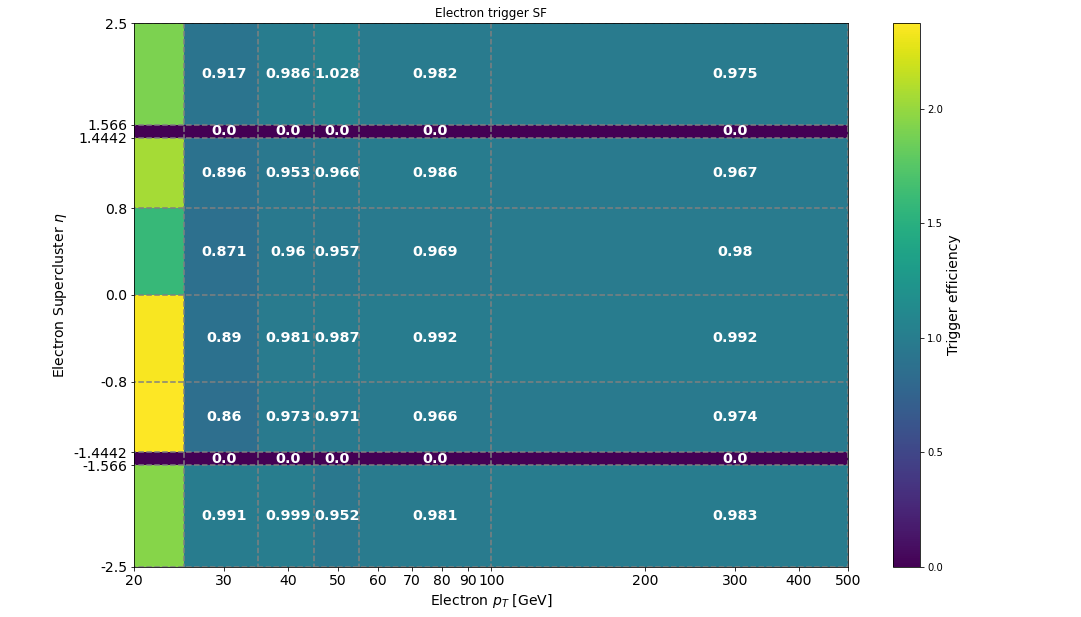

In [14]:
fontsize=14

fig, ax = plt.subplots(figsize=[16,10])
hist, xbins, ybins, im = plt.hist2d(pt.flatten(), eta.flatten(), weights=sf.flatten(), bins=(axis_pt.edges(), axis_eta.edges()))
plt.xlim(0, 500)
plt.xlabel(axis_pt.label, fontsize=fontsize)
plt.ylabel(axis_eta.label, fontsize=fontsize)
plt.xscale('log')
plt.xlim(20, 500)
xticks = [20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500]
yticks = axis_eta.edges()
plt.xticks(xticks, [str(t) for t in xticks], fontsize=fontsize)
plt.yticks(yticks, [str(t) for t in yticks], fontsize=fontsize)
plt.hlines(axis_eta.edges(), axis_pt.edges()[-1], axis_pt.edges()[0], linestyle='--', color='gray')
plt.vlines(axis_pt.edges(), axis_eta.edges()[-1], axis_eta.edges()[0], linestyle='--', color='gray')

for (i, x) in enumerate(bincenter_pt):
    for (j, y) in enumerate(bincenter_eta):
        ax.text(x, y, round(sf[i][j], 3), 
                color="w", ha="center", va="center", fontsize="x-large", fontweight="bold")

plt.title("Electron trigger SF")
cbar = plt.colorbar();
#cbar.set_ticklabels(cbar.ax.get_yticklabels(), fontsize=fontsize)
cbar.set_label("Trigger efficiency", fontsize=fontsize)

In [15]:
output['trigger_efficiency']['Ele32_EleHT_pass']

{'mc': 0.6315063677535736,
 'data': 0.7004667444574095,
 'sf': 1.1091998121082218}

In [16]:
color_mc = {'TTo2L2Nu' : 'dodgerblue', 'TTToSemiLeptonic' : 'tomato'}
opts_mc  = {
    'facecolor': [color_mc[d] for d in color_mc.keys()],
    'edgecolor': 'black',
    'alpha': 1.0
}
opts_data = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: divide by zero encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:38: RuntimeWarning: invalid value encountered in true_divide
  scale[sumw != 0] = sumw2[sumw != 0] / sumw[sumw != 0]
/work/mmarcheg/mi

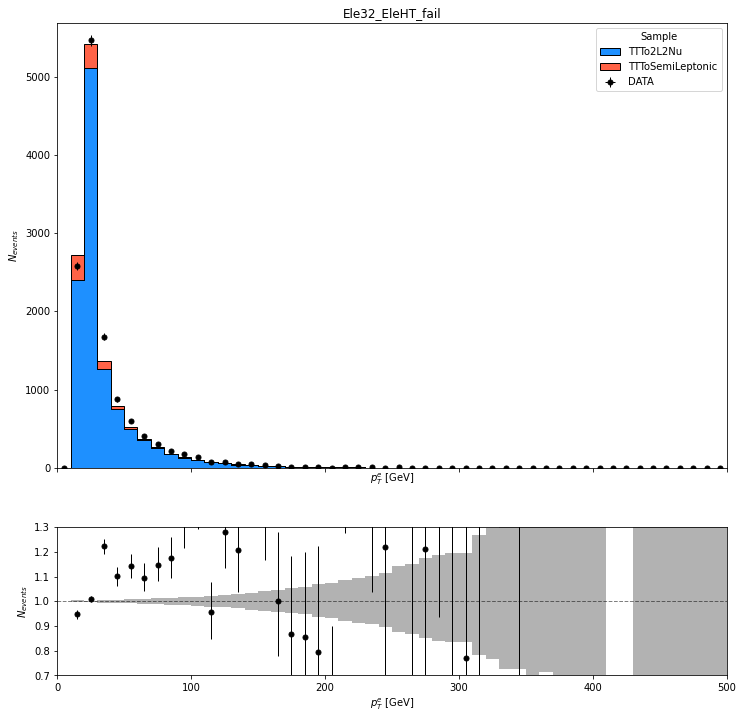

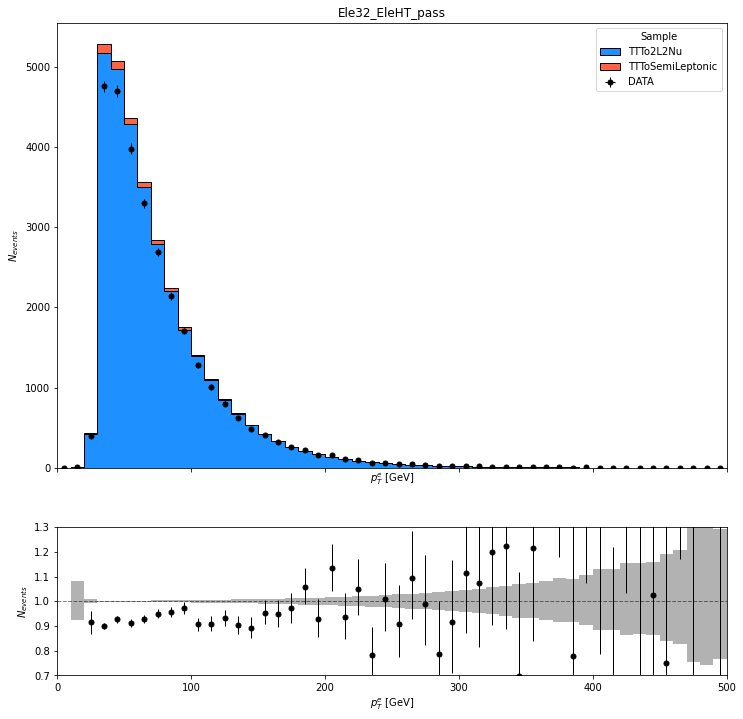

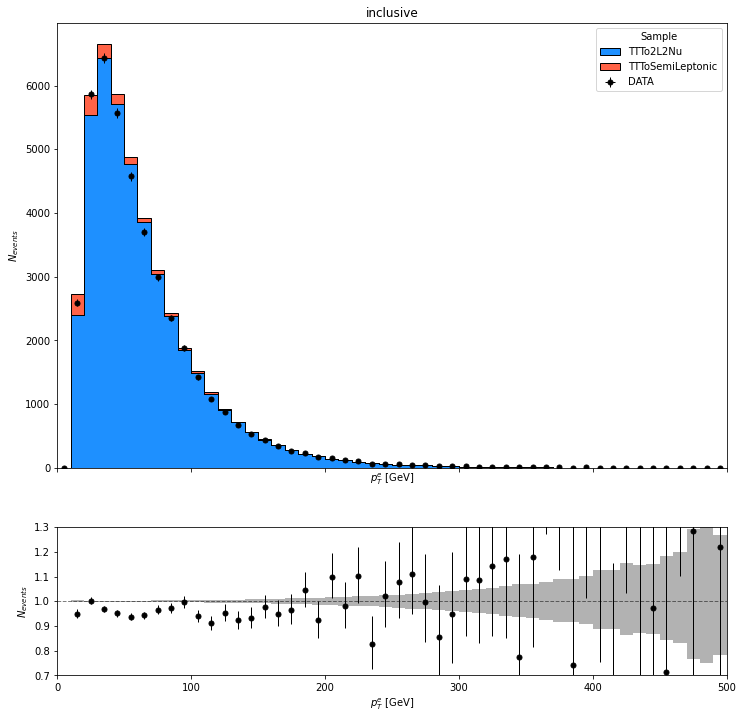

In [17]:
h_ele_pt = output['hist_electron_pt']
for cat in categories + ['inclusive']:
    fig, (ax, rax) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    plot.plot1d(h_ele_pt[(datasets_mc, cat,'2018')].sum('cat', 'year'), ax=ax, fill_opts=opts_mc, stack=True)
    plot.plot1d(h_ele_pt[(['DATA'], cat,'2018')].sum('cat', 'year'), ax=ax, error_opts=opts_data, clear=False)
    plot.plotratio(num=h_ele_pt[(['DATA'], cat,'2018')].sum('cat', 'year', 'sample'), denom=h_ele_pt[(datasets_mc, cat,'2018')].sum('cat', 'year', 'sample'), ax=rax,
                               error_opts=opts_data, denom_fill_opts={}, guide_opts={}, unc='num')
    ax.set_title(cat)
    ax.set_xlim(0, 500)
    rax.set_xlim(0, 500)
    rax.set_ylim(0.7, 1.3)
    #plt.savefig(os.path.join(plot_dir, "datamc_electron_pt.png"), dpi=300, format="png")

In [18]:
x = np.array([1,3,5,7,4,2,0.4])
np.quantile(x, np.arange(0.2,1,0.2))

array([1.2, 2.4, 3.6, 4.8])

In [19]:
np.arange(0.2,1,0.2)

array([0.2, 0.4, 0.6, 0.8])

In [20]:
np.cumsum(x)

array([ 1. ,  4. ,  9. , 16. , 20. , 22. , 22.4])

In [21]:
np.cumsum(x)/sum(x)

array([0.04464286, 0.17857143, 0.40178571, 0.71428571, 0.89285714,
       0.98214286, 1.        ])

In [22]:
len(x)*np.cumsum(x)/sum(x)

array([0.3125, 1.25  , 2.8125, 5.    , 6.25  , 6.875 , 7.    ])

In [23]:
x = h_ele_pt[(datasets, 'inclusive','2018')].sum('cat', 'year').values()[('TTTo2L2Nu',)]
x

array([0.00000000e+00, 2.40365222e+03, 5.53596123e+03, 6.42893179e+03,
       5.71542433e+03, 4.77526642e+03, 3.85141658e+03, 3.03777082e+03,
       2.37973644e+03, 1.85304819e+03, 1.48746038e+03, 1.16676010e+03,
       9.04981341e+02, 7.12853426e+02, 5.61690471e+02, 4.44646754e+02,
       3.51176329e+02, 2.74302109e+02, 2.19518902e+02, 1.78813096e+02,
       1.43309998e+02, 1.19423961e+02, 9.39934276e+01, 8.11424046e+01,
       6.36729939e+01, 5.07858477e+01, 4.17531742e+01, 3.68526727e+01,
       2.75757373e+01, 2.27046652e+01, 1.99589507e+01, 1.63368303e+01,
       1.35846814e+01, 1.08546980e+01, 8.88479157e+00, 8.25094980e+00,
       6.71490297e+00, 5.23991463e+00, 5.30842034e+00, 4.26978258e+00,
       2.71568317e+00, 2.76608268e+00, 2.01733315e+00, 2.01916930e+00,
       2.01263223e+00, 1.40170908e+00, 1.12243305e+00, 7.33731886e-01,
       6.04093356e-01, 7.75894276e-01, 7.12262552e-01, 5.19779302e-01,
       5.96118803e-01, 3.41107193e-01, 3.61941901e-01, 3.58364193e-01,
      

/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:458: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/m

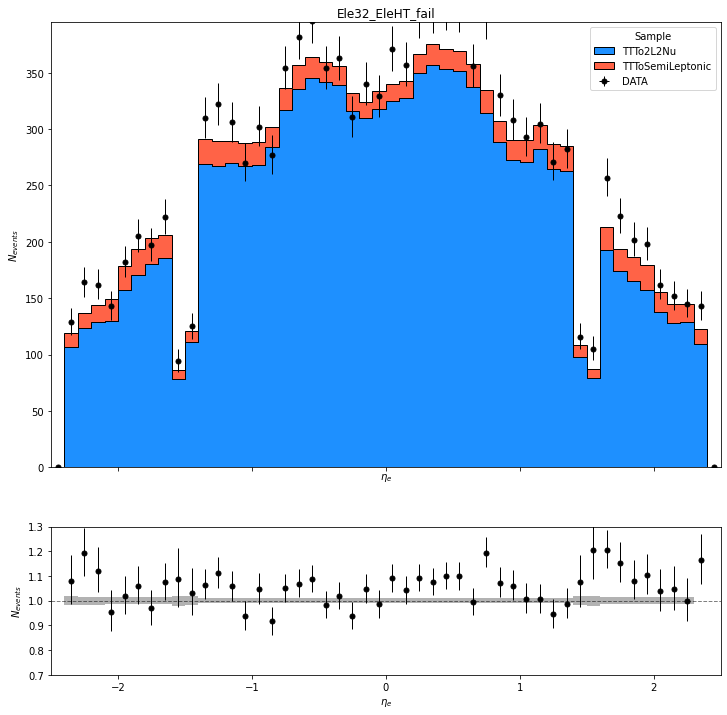

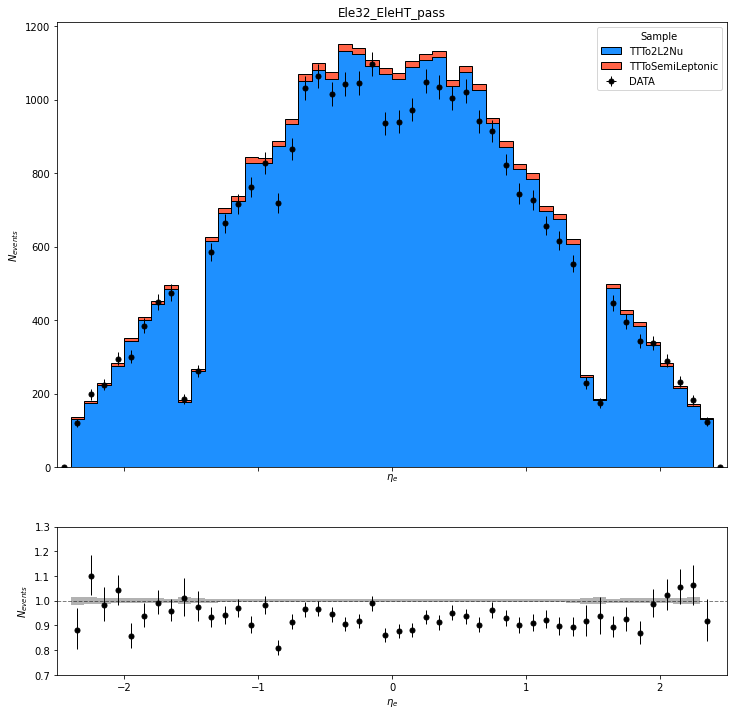

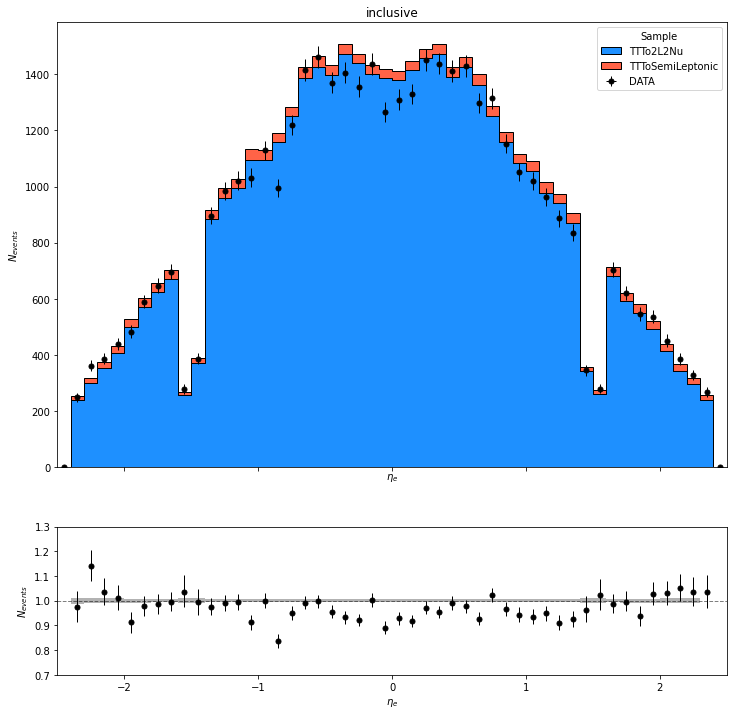

In [32]:
h_ele_eta = output['hist_electron_eta']
for cat in categories + ['inclusive']:
    fig, (ax, rax) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    plot.plot1d(h_ele_eta[(datasets_mc, cat,'2018')].sum('cat', 'year'), ax=ax, fill_opts=opts_mc, stack=True)
    plot.plot1d(h_ele_eta[(['DATA'], cat,'2018')].sum('cat', 'year'), ax=ax, error_opts=opts_data, clear=False)
    plot.plotratio(num=h_ele_eta[(['DATA'], cat,'2018')].sum('cat', 'year', 'sample'), denom=h_ele_eta[(datasets_mc, cat,'2018')].sum('cat', 'year', 'sample'), ax=rax,
                               error_opts=opts_data, denom_fill_opts={}, guide_opts={}, unc='num')
    ax.set_xlim(-2.5, 2.5)
    rax.set_xlim(-2.5, 2.5)
    rax.set_ylim(0.7, 1.3)
    ax.set_title(cat)

In [25]:
x = np.array([1, 3, 7, 10])
np.ediff1d(x)

array([2, 4, 3])

In [26]:
h[(datasets_mc, 'inclusive', '2018')].values()

{('TTToSemiLeptonic',
  'inclusive',
  '2018'): array([[9.12635286e+01, 0.00000000e+00, 7.66270205e+01, 8.79048862e+01,
         8.71587296e+01, 7.55374686e+01, 0.00000000e+00, 8.91306913e+01],
        [4.05823932e+01, 0.00000000e+00, 3.86633898e+01, 4.47390625e+01,
         4.44366757e+01, 3.95123164e+01, 0.00000000e+00, 4.29746735e+01],
        [2.67920464e+01, 0.00000000e+00, 3.00743804e+01, 3.27901862e+01,
         3.31615207e+01, 2.63226540e+01, 0.00000000e+00, 2.75426403e+01],
        [1.64623822e+01, 0.00000000e+00, 1.94206832e+01, 2.54333373e+01,
         2.48773488e+01, 2.03278393e+01, 0.00000000e+00, 1.75594887e+01],
        [3.37052564e+01, 0.00000000e+00, 4.09441973e+01, 5.84401817e+01,
         5.81311509e+01, 4.40703951e+01, 0.00000000e+00, 3.32711640e+01],
        [1.23452464e+01, 0.00000000e+00, 1.67203110e+01, 2.94350210e+01,
         2.82584733e+01, 1.77031426e+01, 0.00000000e+00, 1.24151524e+01],
        [4.04324160e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00

/tmp/ipykernel_44243/2450080615.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,500);
/tmp/ipykernel_44243/2450080615.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,100000);


<Hist (cat,pt,etaSC) instance at 0x7f1d007ac850>

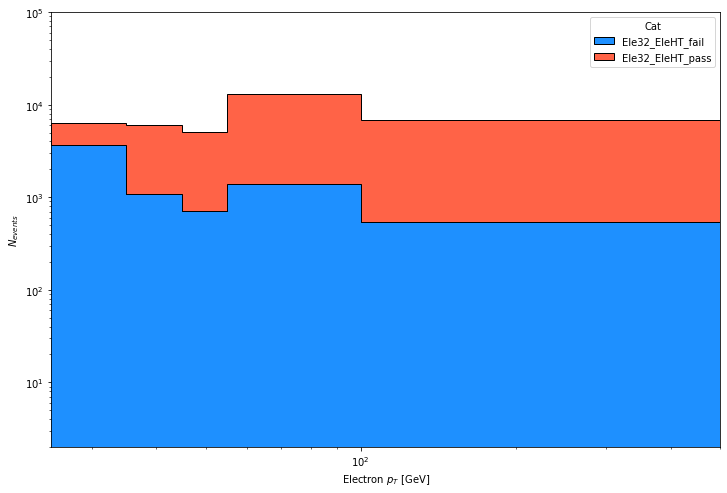

In [27]:
h_mc_pt = h_mc.project('cat', 'pt')
h_data_pt = h_data.project('cat', 'pt')
cat_passfail = list(filter(lambda x : 'Ele32_EleHT' in x, categories))
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plot.plot1d(h_data_pt[cat_passfail], ax=ax, fill_opts=opts_mc, stack=True)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0,500);
plt.ylim(0,100000);
h_data

(0.5, 1.5)

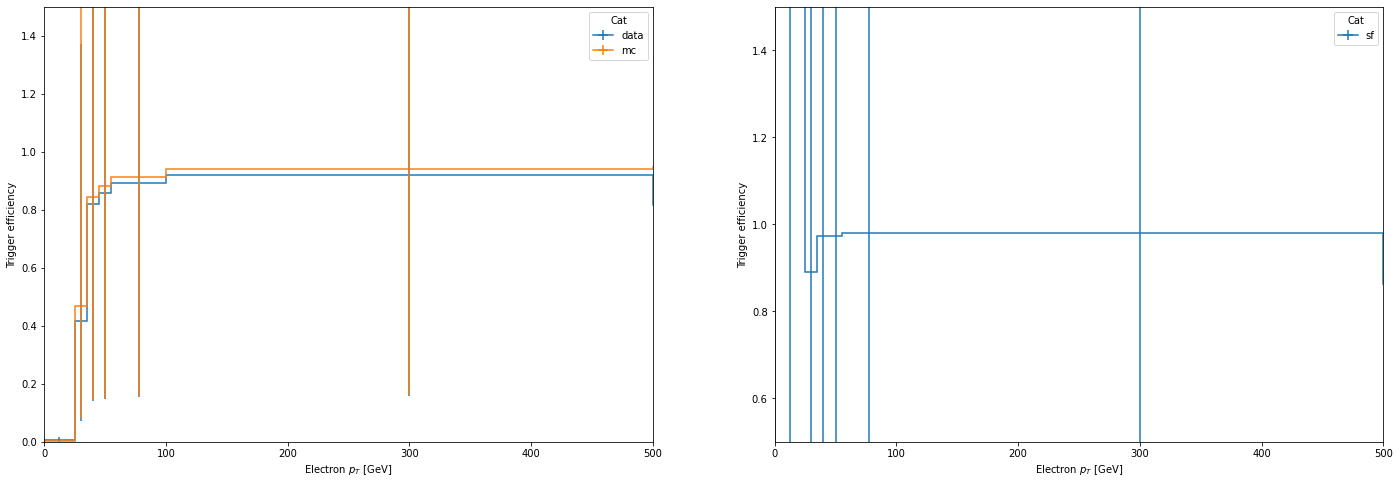

In [28]:
cat = "Ele32_EleHT_pass"
axis_cat = h_mc_pt.axis('cat')
axis_electron_pt = h_mc_pt.axis('pt')
w_mc = h_mc_pt[cat].sum('cat').values()[()] / h_mc_pt['inclusive'].sum('cat').values()[()]
w_data = h_data_pt[cat].sum('cat').values()[()] / h_data_pt['inclusive'].sum('cat').values()[()]
eff_pt = Hist("Trigger efficiency", axis_cat, axis_electron_pt)
eff_pt.fill(cat='mc', pt=bincenter_pt, weight=w_mc)
eff_pt.fill(cat='data', pt=bincenter_pt, weight=w_data)
eff_pt.fill(cat='sf', pt=bincenter_pt, weight=w_data/w_mc)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=[24,8])
plot.plot1d(eff_pt[['mc','data']], ax=ax1);
ax1.set_xlim(0,500)
ax1.set_ylim(0,1.5)
plot.plot1d(eff_pt[['sf']], ax=ax2);
ax2.set_xlim(0,500)
ax2.set_ylim(0.5,1.5)
#eff_data_pt = h_data_pt[cat].sum('cat').values()[()]/h_data_pt['inclusive'].sum('cat').values()[()]
#sf_pt = eff_data_pt/eff_mc_pt
#sf_pt = np.nan_to_num(np.where(~np.isinf(sf_pt), sf_pt, np.nan))
#sf_pt

In [29]:
h_mc_pt['inclusive'].sum('cat').values()[()]

array([5.57202808e+03, 6.37264929e+03, 6.33361817e+03, 5.34714690e+03,
       1.36836233e+04, 7.21586782e+03, 5.11430575e+00])

In [30]:
1./h_mc_pt['inclusive'].sum('cat').values()[()]

array([1.79467868e-04, 1.56920608e-04, 1.57887636e-04, 1.87015621e-04,
       7.30800593e-05, 1.38583470e-04, 1.95529960e-01])